## Exercise 1 - Bayes classification system

In [468]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [469]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [470]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [471]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [472]:
# TODO: Compute the priors

unique, counts = np.unique(y_train, return_counts=True)

P_c0 = counts[0] / (counts[0] + counts[1])
P_c1 = counts[1] / (counts[0] + counts[1])
print(f"P(C0) = {P_c0}, P(C1) = {P_c1}")



P(C0) = 0.4, P(C1) = 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

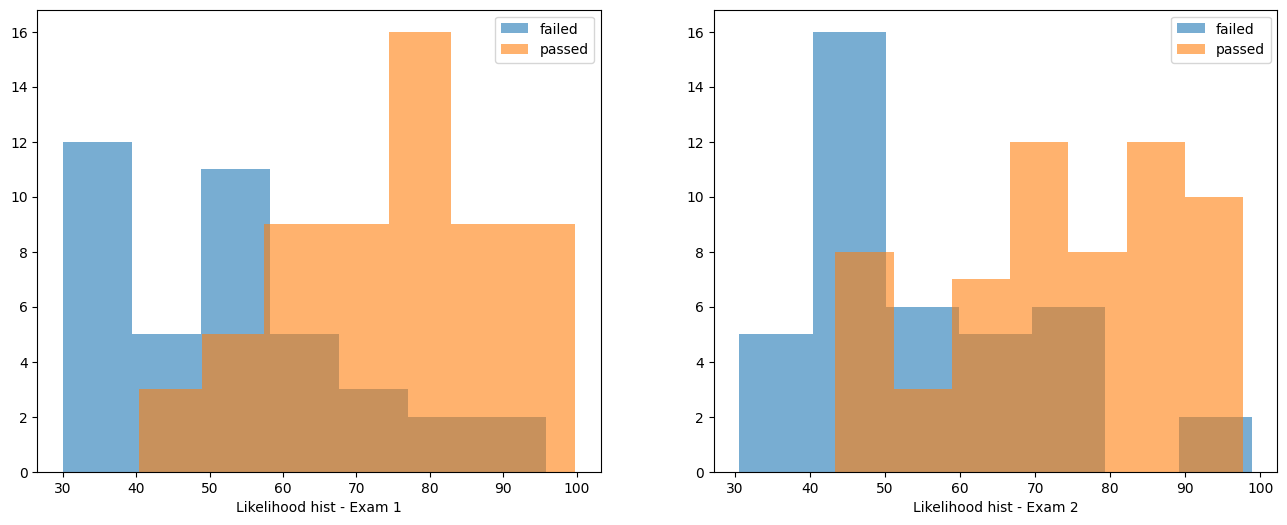

In [473]:
# TODO: Compute histograms

X_train = np.array(X_train)


x1_combined = np.column_stack((X_train[:,0], y_train))

x1_c0 = x1_combined[y_train == 0]
x1_c1 = x1_combined[y_train == 1]

x1_c0_hist, x1_c0_bins = np.histogram(x1_c0[:,0], bins="auto")
x1_c1_hist, x1_c1_bins = np.histogram(x1_c1[:,0], bins="auto")


x2_combined = np.column_stack((X_train[:,1], y_train))

x2_c0 = x2_combined[y_train == 0]
x2_c1 = x2_combined[y_train == 1]

x2_c0_hist, x2_c0_bins = np.histogram(x2_c0[:,0], bins="auto")
x2_c1_hist, x2_c1_bins = np.histogram(x2_c1[:,0], bins="auto")

# TODO: plot histograms

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.hist(x1_c0[:,0], bins="auto", alpha=0.6, label="failed")
plt.hist(x1_c1[:,0], bins="auto", alpha=0.6, label="passed")
plt.legend()
...
plt.xlabel('Likelihood hist - Exam 1')

plt.subplot(1, 2, 2)
plt.hist(x2_c0[:,0], bins="auto", alpha=0.6, label="failed")
plt.hist(x2_c1[:,0], bins="auto", alpha=0.6, label="passed")
plt.legend()
...
plt.xlabel('Likelihood hist - Exam 2')

plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [474]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs

    bin_index = np.digitize(x, bin_edges) - 1

    if bin_index >= len(hist_values) or bin_index < 0:
        return 0

    # print(f"edges = {bin_edges}")
    # print(f"values = {hist_values}")
    # print(f"selected bin = {bin_index}")

    count = hist_values[bin_index]
    return count/np.sum(hist_values)

In [475]:
hist, edges = np.histogram(x2_y0[:,0], bins="auto")
likelihood_hist(45, hist, edges)

np.float64(0.4)

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [476]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [477]:
# TODO: predict on test set in the 3 cases described above

y_pred_x1 = []

X_test = np.array(X_test)

for i in range(len(X_test)):
    P_c0_x1 = likelihood_hist(X_test[i,0], x1_c0_hist, x1_c0_bins)*P_c0
    P_c1_x1 = likelihood_hist(X_test[i,0], x1_c1_hist, x1_c1_bins)*P_c1

    if P_c0_x1 > P_c1_x1:
        y_pred_x1.append(0)
    else:
        y_pred_x1.append(1)

print(f"Pred accuracy with x1 {accuracy_score(y_test, y_pred_x1)}")



y_pred_x2 = []

for i in range(len(X_test)):
    P_c0_x2 = likelihood_hist(X_test[i,1], x2_c0_hist, x2_c0_bins)*P_c0
    P_c1_x2 = likelihood_hist(X_test[i,1], x2_c1_hist, x2_c1_bins)*P_c1

    if P_c0_x2 > P_c1_x2:
        y_pred_x2.append(0)
    else:
        y_pred_x2.append(1)

print(f"Pred accuracy with x2 {accuracy_score(y_test, y_pred_x2)}")




y_pred_x1_x2 = []

for i in range(len(X_test)):
# for i in range(0,1):
    P_c0_x1 = likelihood_hist(X_test[i,0], x1_c0_hist, x1_c0_bins)*P_c0
    P_c1_x1 = likelihood_hist(X_test[i,0], x1_c1_hist, x1_c1_bins)*P_c1
    P_c0_x2 = likelihood_hist(X_test[i,1], x2_c0_hist, x2_c0_bins)*P_c0
    P_c1_x2 = likelihood_hist(X_test[i,1], x2_c1_hist, x2_c1_bins)*P_c1

    if P_c0_x2*P_c0_x1 > P_c1_x1*P_c1_x2:
        y_pred_x1_x2.append(0)
    else:
        y_pred_x1_x2.append(1)

print(f"Pred accuracy with x1 and x2 {accuracy_score(y_test, y_pred_x1_x2)}")



Pred accuracy with x1 0.64
Pred accuracy with x2 0.72
Pred accuracy with x1 and x2 0.87


Which system is the best ?

The system with both variables is clearly the better one and this makes sense, because the chance of success of a student is clearly related to the performance of both exams, not just one. The system with one variable only can only make better decisions when the student has really highly failed or succeded an exam, which would mean the second variable could be less important. For example, if one has 0 on the first exam, it is really not probable that he will pass, even if we don't know the second grade.

All in all, more variables in this case mean a better approximation.

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [478]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs

    sqrt = np.sqrt(2*np.pi*var)
    exp = np.exp(-(1/(2*var)) * (x - mean)**2)

    return (1/sqrt) * exp

In [479]:
# TODO: Compute mean and variance for each classes and each features (8 values)

mean_x1_c0 = np.mean(X_train[:,0][y_train == 0])
mean_x1_c1 = np.mean(X_train[:,0][y_train == 1])

mean_x2_c0 = np.mean(X_train[:,1][y_train == 0])
mean_x2_c1 = np.mean(X_train[:,1][y_train == 1])

var_x1_c0 = np.var(X_train[:,0][y_train == 0])
var_x1_c1 = np.var(X_train[:,0][y_train == 1])

var_x2_c0 = np.var(X_train[:,1][y_train == 0])
var_x2_c1 = np.var(X_train[:,1][y_train == 1])





In [480]:
# TODO: predict on test set in the 3 cases

y_pred_x1 = []

for i in range(len(X_test)):
    P_c0_x1 = likelihood_univariate_gaussian(X_test[i,0], mean_x1_c0, var_x1_c0)*P_c0
    P_c1_x1 = likelihood_univariate_gaussian(X_test[i,0], mean_x1_c1, var_x1_c1)*P_c1

    if P_c0_x1 > P_c1_x1:
        y_pred_x1.append(0)
    else:
        y_pred_x1.append(1)

print(f"Pred accuracy with x1 {accuracy_score(y_test, y_pred_x1)}")

y_pred_x2 = []

for i in range(len(X_test)):
    P_c0_x2 = likelihood_univariate_gaussian(X_test[i,1], mean_x2_c0, var_x2_c0)*P_c0
    P_c1_x2 = likelihood_univariate_gaussian(X_test[i,1], mean_x2_c1, var_x2_c1)*P_c1

    if P_c0_x2 > P_c1_x2:
        y_pred_x2.append(0)
    else:
        y_pred_x2.append(1)

print(f"Pred accuracy with x2 {accuracy_score(y_test, y_pred_x2)}")




y_pred_x1_x2 = []

for i in range(len(X_test)):
# for i in range(0,1):
    P_c0_x1 = likelihood_univariate_gaussian(X_test[i,0], mean_x1_c0, var_x1_c0)*P_c0
    P_c1_x1 = likelihood_univariate_gaussian(X_test[i,0], mean_x1_c1, var_x1_c1)*P_c1
    P_c0_x2 = likelihood_univariate_gaussian(X_test[i,1], mean_x2_c0, var_x2_c0)*P_c0
    P_c1_x2 = likelihood_univariate_gaussian(X_test[i,1], mean_x2_c1, var_x2_c1)*P_c1

    if P_c0_x2*P_c0_x1 > P_c1_x1*P_c1_x2:
        y_pred_x1_x2.append(0)
    else:
        y_pred_x1_x2.append(1)

print(f"Pred accuracy with x1 and x2 {accuracy_score(y_test, y_pred_x1_x2)}")


Pred accuracy with x1 0.71
Pred accuracy with x2 0.72
Pred accuracy with x1 and x2 0.92
